In [121]:
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float, inspect
from sqlalchemy.ext.automap import automap_base
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')
import csv

In [122]:
# Create an engine for the `hawai` databasee
engine=create_engine("sqlite:///../Instructions/Resources/hawaii.sqlite", echo=False)

In [123]:
# Reflect Database into ORM class
Base=automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()


['measurement', 'station']

In [124]:
#Crear tablas
Measurement=Base.classes.measurement
Station=Base.classes.station
inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [125]:
#crear session
session=Session(engine)
con=engine.connect()

# Precipitation Analysis


In [143]:
#To see whats inside the DB
measurement_df=pd.read_sql_query('Select * from measurement where date>"2016-12-31"', con)
stations_df=pd.read_sql_query('Select * from station', con)


,prcp
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


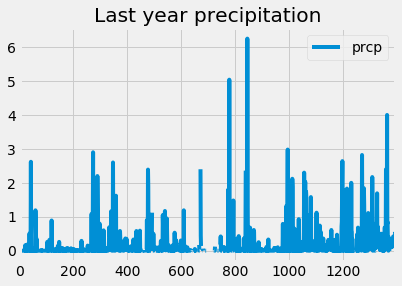

In [127]:
#Select only the `date` and `prcp` values.
measurement_df1=measurement_df[['date','prcp']]
measurement_df1.plot(title="Last year precipitation")
measurement_df1.describe()

# Station Analysis

In [128]:
#* Design a query to calculate the total number of stations.
stationscount=stations_df['station'].count()
print(f' There are {stationscount} stations')


 There are 9 stations


In [132]:
#* Design a query to find the most active stations
#* List the stations and observation counts in descending order..
mostactive=(session.query(Measurement.station, func.count(Measurement.station))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.station).desc())
                        .all())
mostactive

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [137]:
#  * Which station has the highest number of observations?
mostactive=mostactive[0]
mostactive

'USC00519281'

In [160]:
#Design a query to retrieve the last 12 months of temperature observation data (TOBS).

temperaturedata=session.query(Measurement.tobs).\
filter(Measurement.date>"2016-12-31").\
filter(Measurement.station == "USC00519281").all()
temperaturedata

temperature1=[temp[0] for temp in temperaturedata]
temperature1

[72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,
 69.0,
 77.0,
 70.0,
 74.0,
 69.0,
 72.0,
 71.0,
 69.0,
 71.0,
 71.0,
 72.0,
 72.0,
 69.0,
 70.0,
 66.0,
 65.0,
 69.0,
 68.0,
 68.0,
 68.0,
 59.0,
 60.0,
 70.0,
 73.0,
 75.0,
 64.0,
 59.0,
 59.0,
 62.0,
 68.0,
 70.0,
 73.0,
 79.0,
 75.0,
 65.0,
 70.0,
 74.0,
 70.0,
 70.0,
 71.0,
 71.0,
 71.0,
 69.0,
 61.0,
 67.0,
 65.0,
 72.0,
 71.0,
 73.0,
 72.0,
 77.0,
 73.0,
 67.0,
 62.0,
 64.0,
 67.0,
 66.0,
 81.0,
 69.0,
 66.0,
 67.0,
 69.0,
 66.0,
 68.0,
 65.0,
 74.0,
 69.0,
 72.0,
 73.0,
 72.0,
 71.0,
 76.0,
 77.0,
 76.0,
 74.0,
 68.0,
 73.0,
 71.0,
 74.0,
 75.0,
 70.0,
 67.0,
 71.0,
 67.0,
 74.0,
 77.0,
 78.0,
 67.0,
 70.0,
 69.0,
 69.0,
 74.0,
 78.0,
 71.0,
 67.0,
 68.0,
 67.0,
 76.0,
 69.0,
 72.0,
 76.0,
 68.0,
 72.0,
 74.0,
 70.0,
 67.0,
 72.0,
 60.0,
 65.0,
 75.0,
 70.0,
 75.0,
 70.0,
 79.0,
 75.0,
 70.0,
 67.0,
 74.0,
 70.0,
 75.0,
 76.0,
 77.0,
 74.0,
 74.0,
 74.0,
 69.0,
 68.0,
 76.0,
 74.0,
 71.0,
 71.0,

<Figure size 432x288 with 0 Axes>

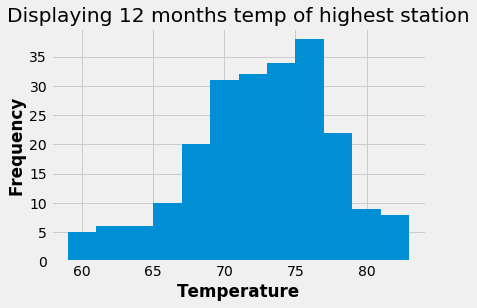

<Figure size 432x288 with 0 Axes>

In [161]:
plt.hist(temperature1, bins=12)
plt.title("Displaying 12 months temp of highest station")
labels = ['tobs']
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')
plt.figure(2)

In [176]:
from flask import Flask, jsonify

In [177]:
app=Flask(__name__)

In [193]:
@app.route("/")
def home():
    return("/api/v1.0/precipitation<br/>"
    "/api/v1.0/stations<br/>"
    "/api/v1.0/tobs<br/>"
    "/api/v1.0/2017-01-01<br/>")

AssertionError: View function mapping is overwriting an existing endpoint function: home

In [191]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    results = session.query(measurement.date, measurement.prcp).all()
    first_dict = list(np.ravel(results))

    return jsonify(first_dict)

AssertionError: View function mapping is overwriting an existing endpoint function: precipitation

In [ ]:
@app.route("/api/v1.0/stations")
def stations():
    results2=session.query(Station.station, Station.name).all()
    results2_dict=list(np.ravel(results2))
    return jsonify(results2_dict)

In [195]:
@app.route("/api/v1.0/tobs")
def tobs():
    results3 = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.date>="2016-08-23").\
            filter(Measurement.date<="2017-08-23").all()
    dics=list(np.ravel(results3))
    return jsonify(dics)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 6)